<a href="https://colab.research.google.com/github/Madrinmarison/Deep_Learning/blob/main/Neural_network_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is classification problem?
Problem in which we group features by categories they belong.

*Categories of classification problems*:

**1. Binary classification:** Is somthing one thing or another?
- Is this email spam or not?
- Predicting whether someone has a heart-deases or not based on their heath features.

**Multiclass classification:**
Predicting whether the features your have belongs to one of atleast 3 class you have.
- Predict whether a photo is of a cat, dog or a chick... You can have even thousands of image classes.

**Multilabel classification:** An example has more than one label.

Example:
An article that can be labeled either: A machine learning, Representaion learning, Airtificial Inteligence.




## Steps in modelling
Steps in modelling with tensorflow are typically:

1. Get data ready
2. Build a model or pick a pretrained model that suits your problem (in our case we build)
3. Compile the model
4. Fit the model to the data and make prediction
5. Evaluate the model(tweak evaluate)
6. Improve through experimentation
6. Save and reload the model

**Dataset**
The dataset used here is image dataset. An image has width, hight and three color channels, RGB.

## General Work Path:
### 1. Getting data ready
- Ensure all images of the dataset have same size. (Understand your input-output shape). Width and hight are arbitraliry
- Get pixel matrix for each image in the dataset
- If building a model from scratch, normalize the data
- Split data into train, development/validation and test sets
- create model callbacks if needed
- Create a performant data-load pipelines for each dataset

### 2. Run modelling experimentation
- Build the model, compile the model, fit the model
- Evaluate the model
- Make predictions
- Visualize predictions
- Calculate model performance metrics

### 3. Comparing experimnentation models performance
- Create a dataframe of performance metrics of all different model build in the session (examples are the model and columns are the metrics)
- Sort datafrane by the metric of interest.
- Create a bar grap of the  metric of interest.

Pick the model whose performance has the best time complexity and high performance as well based on the scale of usability in production.

### What this notebook cover:
- Architecture of neural networks *classification* model
- Input and output shapes of a classification model (features and labels)
- Creating custom data to view and fit
-Steps in modelling:
 - Creating model, compilling the model, fitting the model, and evaluating a model
- Different classification evaluation metrics
- Saving and loading models

### Understanding input and output shapes of a classification problem

Suppose we need to create a model that classify an image as of one class of atleast two classes we might have in our dataset. Then understanding the input and output shape is the first crucial step we should take. Suppose we have and as shown in the figure below.

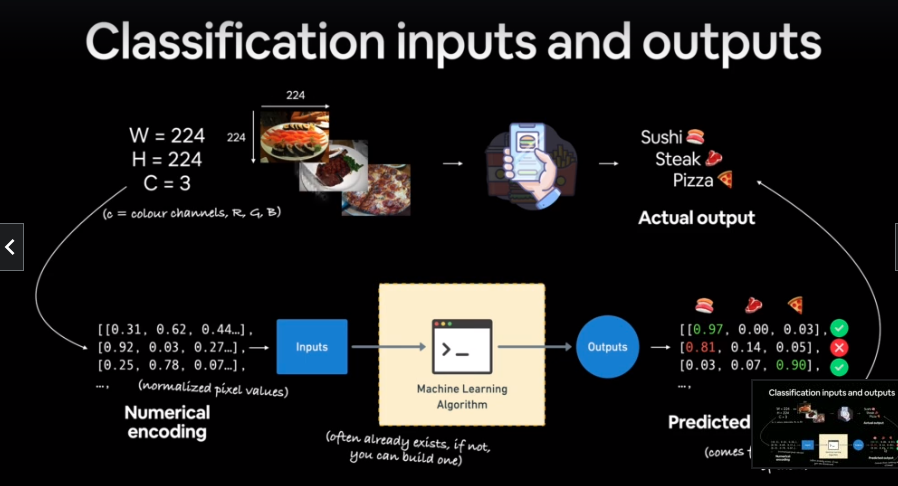

- **Image inputs shapes:**

Number of features in each single image:

 - Input_shape = [Batch_Size, H, W, C ] = (total number of features in an image)

 Example:

 shape = [32, 224,224,3]

 where:
  - 32 is the batch size
  - 224, 224, is the image width and height respectively
  - 3 is the colour channels


**Output Shape:**

3 -  (We have three potential classes)!





**To Note from the figure:**
- Each of the three images have Width (W) and Hight (H). Since they are all colored each has three color channels.

    W and H are arbitraliry, however, we need to ensure all images in our dataset have the same shape.

- Numerical encoding of images:

 Each image is usually encoded into its pixel values, pixels values are usually between 0 and 255 and they're numerical representation of the image features. This is te data we use in building of our machine learning models. However as you can notice from the data being fit to the model, all values are between 0 and 1. This is call data normalization. Neural Networks prefer a standardized data. This has advantage in that, it prevents large pixel values from dominating the small ones. This presents the model an opportunity to farely learn patterns in the data according to each pixel contribution to the data.

- Pass the data to the machine learning algorithm. (Data is passed eaither to train the model or to make predictions on). Since we don't have a mnodel at the moment, that what we will build in this nitebook.

- Output:
The model takes in numerical features and retrun a tensor of probabilities. According to the model prediction, the identity of the input example is the item of the list of class names, that corresponds to the index of the largest value of the model prediction output on the first axis. If the number of the potential classes we have in our data is n, for example n=3, then the size of the model output will be 3. If we are making predictions on m examples, for example m=0, then we end up with m number of predictions, thus the output size is *(m,n)*, i.e., (10,3).

## Getting started

### Creating a custom dataset

In [ ]:
from sklearn.datasets import make_circles
# Make 1000 samples
n_sample = 1000

# Craete circles
X,y = make_circles(n_sample,
                  noise = 0.03,
                  random_state = 42)

In [ ]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little ghard to understand right now so lets visualize it!

In [ ]:
# create a dataframe
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles[:10]

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


# How to plot more than one feature
3-D (Not possible to visualize beyond three D.)

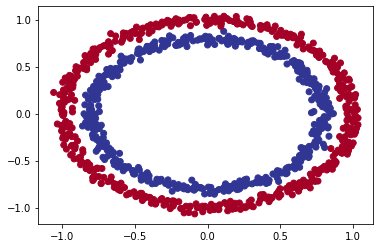

In [ ]:
#  Visualize our data with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu);

**Goal:**
Develop a model to draw a distiguishing line (decision boundary) of whether data is in blue or red class.

## Input and output shapes

In [ ]:
# check the shapes of our input and output data
X[0].shape, y[0].shape

((2,), ())

Input shape: *(2,)*

Output shape: *()*

There two features in our inpu data.

In [ ]:
# check how many samples we are working with
len(X), len(y)

(1000, 1000)

In [ ]:
# Check the number of classes as well how balanced our data is
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

There two classes, as we expected, in our dataset and the dataset is perfectly balanced, i.e., each class is 50% of the data.

In [ ]:
# Have a look at the data samples
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
X[153], y[153]

(array([ 0.61681531, -0.76094829]), 0)

What to do?

Take the point `(0.61681531, -0.76094829])` and predict to which class it belongs to (does it fall under class 1 or 2).

Since we now know what our inouts are, let's build a neural network to classify the data points.

Accuracy metric - Out of 100 samples, how many our model got right on average!

### Building model one

In [ ]:
# import Tensorflow 
import tensorflow as tf
print(tf.__version__)

2.8.2


Model_1: Develop a simple neural network with 1 layer and appropriate loss function for classification problems.

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


Model accuracy is 48.30%. Out of 100, on average the model is getting 48.30% right. This implies it is doing worse than a fare guessing. We can't rely on such model!

### Run Model experiments to improve the first model

In [ ]:
# Improve the model for training for longer
model_1.fit(X, y, epochs = 200, verbose = 0)

In [ ]:
# evaluate the model
model_1.evaluate(X,y)

32/32 [==============================] - 0s 984us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

- Still the model is not performing well. It's stuck at an accuracy of 50%. Setup model's learning ability by adding an extra layer.

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# fit the model
model_2.fit(X, y, epochs = 100 , verbose = 0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

Model performance is still stuck... It's not even right on guessing

## Trying to improving a not very good model
Let's look at our bag of tricks and see how we can improve our model.

1. Create model- we might add more layers or increase the number of hidden units within a layer use activation function.
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting the model - fit for more  epochs, well (cleaned data)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neuron
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), # changed optimizer
                metrics = ["accuracy"])

# fit the model
model_3.fit(X, y, epochs = 100 , verbose = 0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 894us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

Model is still not performing!

# Visualize the model's not too good predictions.

To do this, create a function, `plot_decision_boundary`. This function is going to:
* Take in the trained model, features (X) and labels (y)
* Create a meshgrid of the different X values.
* Make predictions across the meshgrid
* Plot the predictions as well as the line between different zones (where each unique class falls).


In [ ]:
import numpy as np

In [ ]:
model_3.predict(X)[:3]

array([[0.48793283],
       [0.558875  ],
       [0.5629274 ]], dtype=float32)

In [ ]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1,  X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
    
    # Create X values(data we will make prediction on)
    x_in = np.c_[xx.ravel(), yy.ravel()] # reshape xx and yy, stuck results vertically

    # Make prediction
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred[0]) > 1: # checks the shape of a model prediction on a one exzmple
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


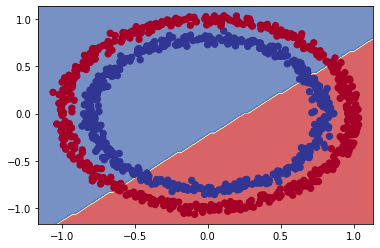

In [ ]:
# check out the predictions our model is making
plot_decision_boundary(model_3,
                       X,
                       y)

The model is Creating a linear boundary for non-linear data. This means our model can be used for linear regression problem but not for non-linear classification problem.

In [ ]:
# Using our model architecture for linear regression
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split the regression data into train and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model to the data
model_3.fit(tf.expand_dims(X_reg_train, axis = -1),
            y_reg_train,
            epochs = 100,
            verbose = 0)

Model fails since we are using a wrong metrics for linear problem.

In [ ]:
X_reg_train

We compile a model for a binary classification problem but we are now working on the regression data.

In [ ]:
# Create some regression data
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regression data into train and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# setup random seed
tf.random.set_seed(42)

# 1. Build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neuron
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_4.compile(loss = tf.keras.losses.mae, # use a regression metric like the one we used
                optimizer = tf.keras.optimizers.Adam(), # changed optimizer
                metrics = ["mae"])

# Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis = -1),
            y_reg_train,
            epochs = 100, verbose = 0)

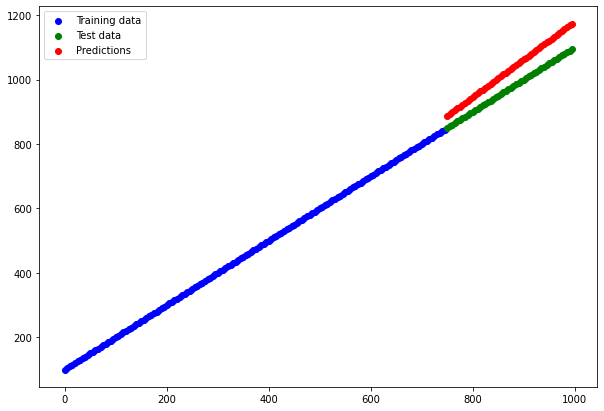

In [ ]:
# make prediction with our trained model
y_pred = model_4.predict(X_reg_test)

# plot the model's prediction against our regression data
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Test data")
plt.scatter(X_reg_test, y_pred, c = "r", label = "Predictions")
plt.legend();

## The missing piece for the model to work for our problem: Non-Linearity


In [ ]:
# set the random seed
tf.random.set_seed(42)

# Build the model with linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "linear")

])

# compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs = 100, verbose = 0)

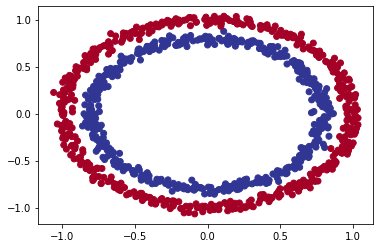

In [ ]:
# Visualize our data
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

doing binary classification


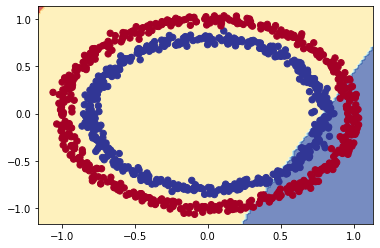

In [ ]:
# check the decision boundaries for our latest model
plot_decision_boundary(model_5,
                       X,
                       y)

**Neural network with non-linear activation function**

In [ ]:
# set random seed
tf.random.set_seed(42)

#  create model with non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# Compile thw model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs =250, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Our model performance is still not increasing. It's still stuck.

doing binary classification


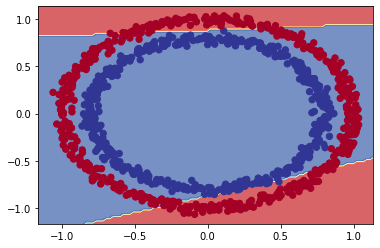

In [ ]:
# How do our model prediction look
plot_decision_boundary(model_6, X, y)

Model is starting to realize red is outside but it looks like is still operating with straight lines. What might be the missing piece in our model.

**Output activation** - none-linear activation function.

### Creating a non-linear model for the problem we have

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1.  create model with non-linear activation
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile thw model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs =100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# 4. Evaluate model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 898us/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

doing binary classification


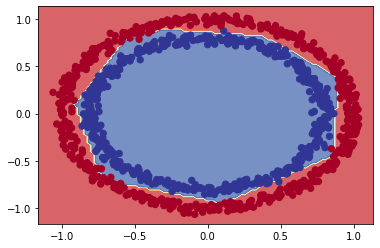

In [ ]:
# Visualize model's incredible metrics
plot_decision_boundary(model_7, X, y)

🤔❓: ***Question:*** What is wrong to the predictions we made? 
- Evaluating our model with the same data we used for training. This does not align with the modelling objective!

"What could you draw if you had am unlimited amount of straight (linear) and non-straight (non-linear) lines?"

🔑 ***Note:*** The combination of **linear (straight lines)** and **(non-linear (non-straight lines) functions** is one of the key fundamentals of the neural networks.

**Linear and non-linear functionspractice.**

In [ ]:
# Create a tensor (same format as the data we passed to the model)
A = tf.cast(tf.range(-10,10), tf.float32)

In [ ]:
print(A)

tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)


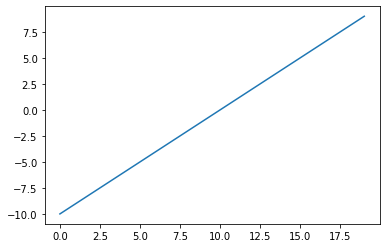

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Use sigmoid function on our toy data and plot results

def plot_sigmoid_curve(x):
    import matplotlib.pyplot as plt
    results =   1 / (1 + tf.exp(-x))
    return plt.plot(results)

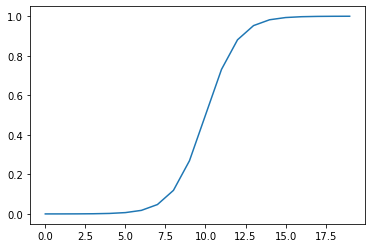

In [ ]:
plot_sigmoid_curve(A);

In [ ]:
# create relu function
def relu(x):
    return tf.maximum(0,x)
    
# pass our data into our relu function
relu_transf = relu(A)
relu_transf

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

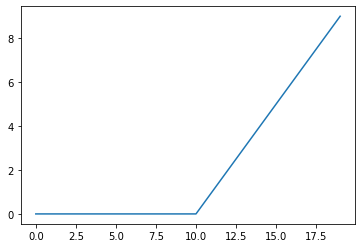

In [ ]:
# plot our transformed data
plt.plot(relu_transf)

In [ ]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

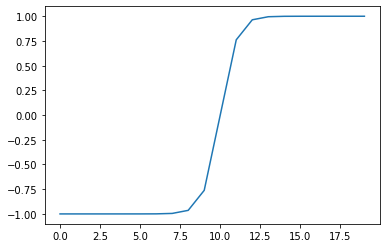

In [ ]:
# lets try tanh
tanh = tf.keras.activations.tanh(A)
plt.plot(tanh)

Neural networks is combination of linear activations and non-linearity activations to find patterns from the data.

# **Getting great results in less time by tweaking the learning rate.**

# Evaluating the classification model
We've been training and testing on the same dataset.

In machine learning this is bascially a wrong way of evaluating.

So, create a training and test set.

In [ ]:
# Check the examples we have
len(X)

1000

In [ ]:
# Split our data using scikit-learn train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Lets recreate a model to fit on the training data

# set rendom seed
tf.random.set_seed(42)

# 1. Build the model (same as model_8)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr =0.01), # set the learning rate
                metrics = ["accuracy"])

# fit the model
history = model_8.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
# Evaluate the model on the test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9800


[0.0536271296441555, 0.9800000190734863]

doing binary classification
doing binary classification


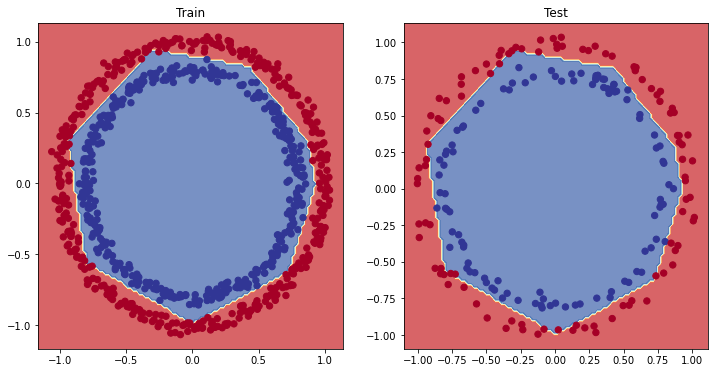

In [ ]:
# plot the  decision boundaries for the training and the test set
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X = X_test, y = y_test)
plt.show();

In [ ]:
model_8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 4)                 12        
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


### Model history
- Plot the loss (or training) curves

In [ ]:
# convert history object into a dataframe
hist_datafarame = pd.DataFrame(history.history)
hist_datafarame

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
...,...,...
95,0.019129,0.99625
96,0.017804,0.99875
97,0.016421,0.99375
98,0.016849,0.99500


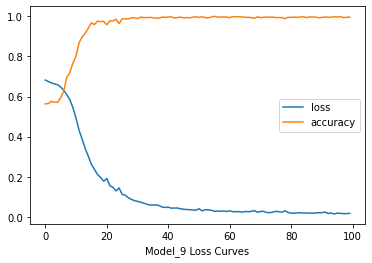

In [ ]:
hist_datafarame.plot()
plt.xlabel("Model_9 Loss Curves");

🔑 **Note:** For many problems, the loss function going down means that the model is improving (the predictions it is making are getting closer to the ground truth labels)

# Finding the best learning rate

To find ideal learning rate (the learning rate where the loss decrease the most during the training) use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model - you could use the same model as above but practice with building a different one
* A modified loss curve.

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create model
history_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
history_9.compile(loss = "binary_crossentropy",
                 optimizer = "Adam",
                 metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
# fit the model (introduce learning-rate call back)
history_9 = history_9.fit(X_train,
                       y_train,
                       epochs = 100,
                       callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

Callback exists during training-- so before we can call model.fit(), the callback has to exist!

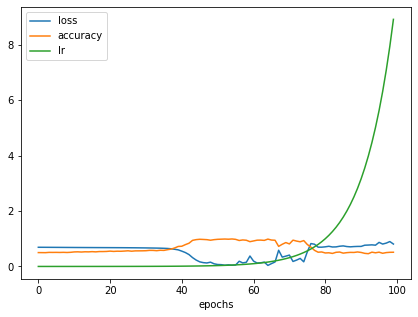

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize = (7,5), xlabel ="epochs");

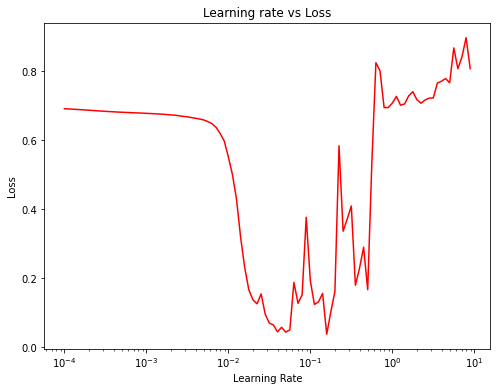

In [ ]:
# plot the learning rate vs the loss
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize = (8,6))
plt.semilogx(lrs, history_9.history["loss"], c ="r")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");

- *ideal* learning: $10^{-2}$

In [ ]:
len(lrs)

100

In [ ]:
#  Example of other typical learning rates values are:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Similarity: all multiples of 10.

In [ ]:
# Learning rate we used before (model_10)
10**-2

0.01

In [ ]:
# Let's try using a higher *ideal* learning with same model as before

# Set random seed
tf.random.set_seed(42)

# Create model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model with ideal learning rate
model_11.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(lr = 0.02),
                 metrics = ["accuracy"])

# set callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**(epoch/20))
# Fit the model
history_11 = model_11.fit(X_train,
             y_train,
             epochs = 25, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Evaluate model_11 on the test dataset
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9750


[0.10717044025659561, 0.9750000238418579]

In [ ]:
# Evaluate model_9 on the test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9800


[0.0536271296441555, 0.9800000190734863]

doing binary classification
doing binary classification


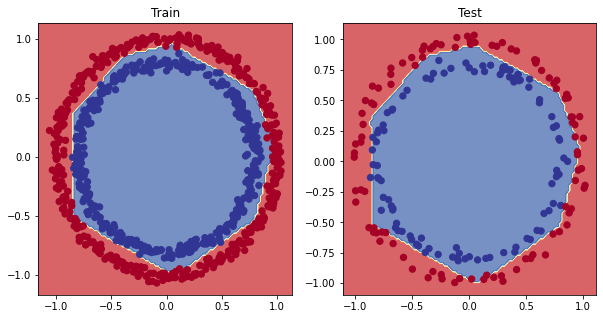

In [ ]:
# polt the decision boundaries for training and test sets
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model = model_11, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model = model_11, X = X_test, y = y_test)
plt.show();

# More Classification Evaluation Methods
Alongside visualizing models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

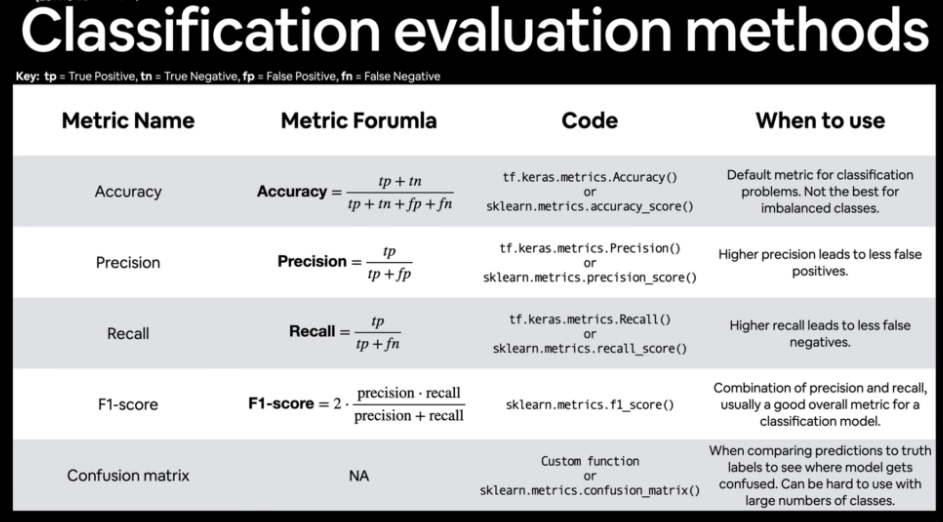

In [ ]:
# check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test set: {np.round(loss, 2)}")
print(f"Model accuracy on the test set: {np.round(accuracy*100, 2)}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9750
Model loss on the test set: 0.11
Model accuracy on the test set: 97.5%


In [ ]:
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss:.2f}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9750
Model loss on the test set: 0.11
Model accuracy on the test set: 97.50%


## Confusion metrix

In [ ]:
# Create a confusion metrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_11.predict(X_test)

# Create a confusion matrix
# confusion_matrix(y_test, y_preds)

Inspect data

In [ ]:
# check y_test
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
# check y_preds
y_preds[:10]

array([[0.99733496],
       [0.34712955],
       [0.99642134],
       [0.01256993],
       [0.7962178 ],
       [0.8826158 ],
       [0.03776491],
       [0.03497159],
       [0.9793737 ],
       [0.21966341]], dtype=float32)

Our prediction array is in **prediction probability** form, the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Covert our predictions probabilities to binary format and and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  4],
       [ 1, 99]])

### Confusion metrix heatmap

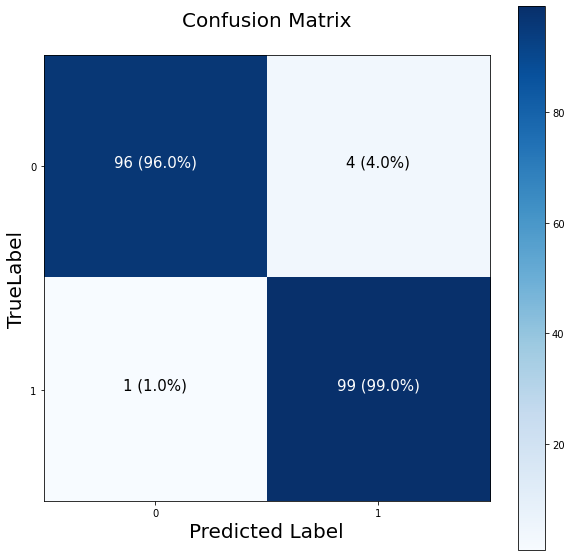

In [ ]:
# Note: the confunsion matrix code we're about to use is a remix of scikit-learn's plot_confusion_matrix
import itertools

figsize = (10,10)

# Create the confusion_matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis = 1) # normalize the confusion matrix

# Number of classes
n_classes = cm.shape[0]

# Make the normalize confusion matrix  visually impresive
fig, ax = plt.subplots(figsize = figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
    labels = False
else:
    labels = np.arange(cm.shape[0])

# Lable the axis
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "TrueLabel",
       xticks = np.arange(n_classes),
       yticks =  np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom() # numbering

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot test on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment = "center",
             color = "white" if cm[i,j] > threshold else "black",
             size = 15)

## **Working with a large example (Multiclass classification):**

When you have more than two classes as an option, it's known as multi-class classification.

* If you have 3 different classes, it's multi-class classification.
* If you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data is already in training and test set 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


**Becoming familiar with the data**

In [ ]:
index = np.random.choice(np.arange(len(train_data)))

In [ ]:
# Get random indices of images
index = np.random.choice(np.arange(len(train_data)))
# set the number of characters per row when printing
np.set_printoptions(linewidth = 400)

# Show the first training example
print(f"Training sample: \n{train_data[index]}\n")
print(f"Training label: \n{train_labels[index]}\n")


Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   8   4   0   0   0   0   0   0   0   0   0   0   0   8  25  53   3   0   0   0]
 [  0   0   0   2   0   0 148 188 203 235 230 224 221 215 195 171 161 162 171 196 201 233 213 215 197   0   0   1]
 [  0   0   0   6   0  82 219 207 204 206 205 204 203 209 209 210 213 215 209 209 207 204 208 213 131   0   0   0]
 [  0   0   0   1   0   9 180 203 207 206 213 216 217 214 210 

In [ ]:
# Check the shape of our images
test_data[0].shape, test_labels[0].shape

((28, 28), ())

In [ ]:
# Create a small list so that we can index our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag", "Ankle boot"]
len(class_names)

10

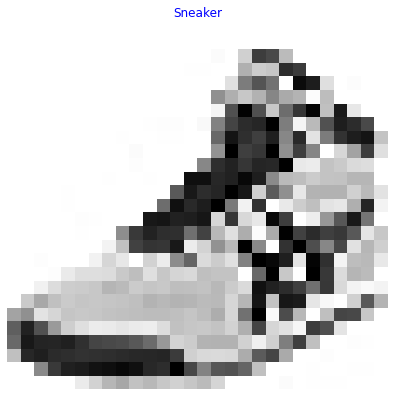

In [ ]:
# plot an example image and it's label

index_of_choice = 45627
plt.figure(figsize = (10,7))
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]], c = "b")
plt.axis(False);

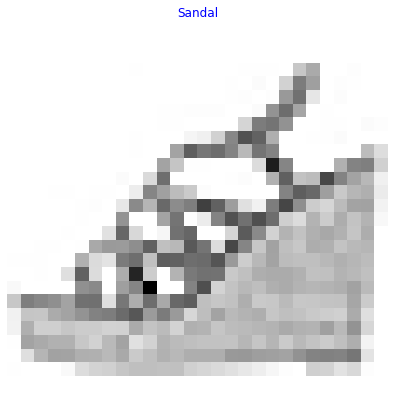

In [ ]:
# Visualize random samples of dataset
rand_index = np.random.choice(np.arange(len(train_data)))
plt.figure(figsize = (10,7))
plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
plt.title(f"{class_names[train_labels[rand_index]]}", color = "b")
plt.axis(False);

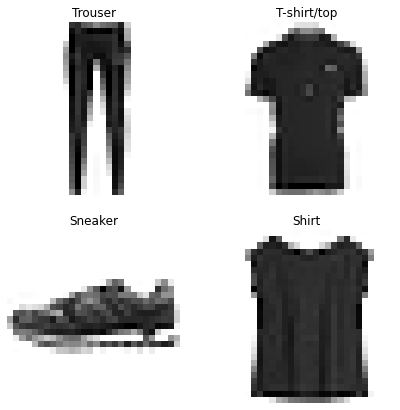

In [ ]:
# plot multiple random images of fashion MNIDT
import random
plt.figure(figsize = (7,7))
for i in range(4):
    ax = plt.subplot(2,2, i + 1)
    rand_index = random.choice(range(len(train_data))) # pick a random number in range of our training data
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model
For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we are going to tweak a few things.

* Input shape = 28 x 28 ( the shape of one image)

* Output shape = 10 (one per class of clothing)

* Loss function = tf.keras.losses.CategoricalCrossentropy()
     * If your labels are one-hot encoded, use `CategoricalCrossentropy()`
     * If your labels are integer form, use `SparseCategoricalCrossentropy()`

* Output layer activation = softmax (not sigmoid)

# Possible cause of errors

Input shape = Data need to be flattened into one long vector

Error again!:

Cause: ---> Loss function:


`CategoricalCrossentropy`: ---> Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation. If you want to provide labels as integers, please use `SparseCategoricalCrossentropy` loss. There should be # classes floating point values per feature.

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_12_ = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# Compile the model
model_12_.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.02),
                 metrics = ["accuracy"])

# Fit the model
non_norm_history = model_12_.fit(train_data,
                                train_labels,
                                epochs = 10,
                                validation_data = (test_data, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 3s 1ms/step - loss: 2.3454 - accuracy: 0.1006 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3054 - accuracy: 0.0989 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3055 - accuracy: 0.1000 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3053 - accuracy: 0.1008 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3052 - accuracy: 0.0994 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3050 - accuracy: 0.1003 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3053 - accuracy: 0.0996 - val_loss: 2.3043 - val_accuracy: 0.1000
Epo

We can one-hot encode labels if they are in numeric form to and work with CategoricalCrossentropy...
If labels are in numeric form however you can use the SparseCategoricalCrossentropy....
Either way, the model will work...

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# Compile the model
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.02),
                 metrics = ["accuracy"])

# Fit the model
non_norm_history = model_12.fit(train_data,
                                tf.one_hot(train_labels, depth = 10),
                                epochs = 10,
                                validation_data = (test_data, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3454 - accuracy: 0.1006 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3054 - accuracy: 0.0989 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3055 - accuracy: 0.1000 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3053 - accuracy: 0.1008 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3052 - accuracy: 0.0994 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3050 - accuracy: 0.1003 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3053 - accuracy: 0.0996 - val_loss: 2.3043 - val_accuracy:

Take away: Binary class classification model can work for multi-class classification data with couple of tweaks:

* Defining what input shape of our data is
* Changing the output layer activation function as well as number of class that are in our task.
* Updating the loss function to reflect the problem we are working with as well as the style our labels are in.

# **Improving our model performance with normalization**

In [ ]:
# check the model summary
model_12.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 4)                 3140      
                                                                 
 dense_44 (Dense)            (None, 4)                 20        
                                                                 
 dense_45 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they are trying to find patterns in to be between 0 & 1. However, our data is between 0 and 255. Thus our data need to be normalized. We can get our training and testing data normalized by dividing by the the maximum (scalling).

In [ ]:
# normalize data
train_data_norm = train_data / 255.0
test_data_norm = test_data/ 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

Now our data is normalized. Let's build a model to find patterns in it.

In [ ]:
# Retrain the model with the normalized data

# set the random seed
tf.random.set_seed(42)

# Create a model (similar to model_12)
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Fit the model
norm_history = model_13.fit(train_data_norm,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized  (numbers between zero and one)

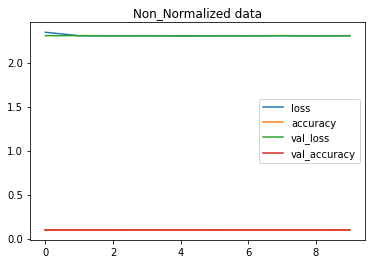

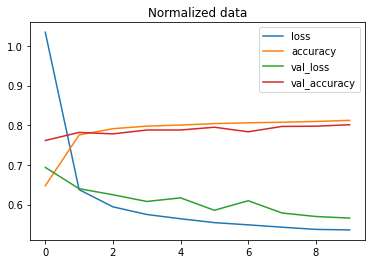

In [ ]:
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title ="Non_Normalized data")

# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title ="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're compairing the models, it is important to ensure you're compairing them in the same criteria (e.g. same  architecture but different data or the same data but different architecture).

Change one thing and compaire the model to another. Not 10 things.

# Finding the ideal learning rate for our neural network

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Build the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create the learnining rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

# Fit the model
find_lr_history = model_14.fit(train_data_norm,
                      train_labels,
                      epochs = 40,
                      validation_data = (test_data_norm, test_labels),
                      callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'Finding the Ideal Learning Rate')

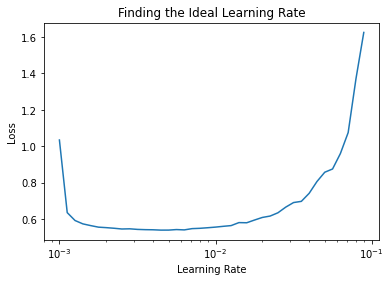

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the Ideal Learning Rate")

Notice where the loss curve if falling, identify the minimum point of the corve, and slightly chose a values before that( where the loss is steadly falling).

It seems the ideal learning rate is 10**-3. Which is the default learning rate for the Adam optimizer.

In [ ]:
# Let's refit the model with the ideal learning rate

# set the random seed
tf.random.set_seed(42)

# Build the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_15.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                 metrics = ["accuracy"])

# Fit the model
history_15 = model_15.fit(train_data_norm,
                      train_labels,
                      epochs = 20,
                      validation_data = (test_data_norm, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

## Evaluating our multi-class classification model
To evaluate our multi-class classification model we could:

* Evaluate its performance using other classification metrics
(such as a confusion matrix)

* Assess some of its predictions (through visualization)

* Improve its results (by training it for longer or change its architecture)

* Save and export it in and application.


Let's go through the top 2...

In [ ]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size =15):
    # Create the confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis = 1) # normalize the confusion matrix

    # Number of classes
    n_classes = cm.shape[0]

    # Make our normalize confusion matrix  beauriful
    fig, ax = plt.subplots(figsize = figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Lable the axis
    ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "TrueLabel",
        xticks = np.arange(n_classes),
        yticks =  np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom() # numbering

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot test on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment = "center",
                color = "white" if cm[i,j] > threshold else "black",
                size = text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# make predictions with our model
y_probs = model_15.predict(test_data)

# View the first 5 predictions
y_probs[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
# make predictions with our model
y_probs = model_15.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

array([[8.5629649e-11, 3.5361295e-13, 2.6633630e-05, 4.6355940e-08,
        5.0949518e-05, 9.6119016e-02, 8.1777735e-08, 9.1869026e-02,
        4.0605143e-03, 8.0787367e-01],
       [3.4278587e-06, 1.2899216e-16, 9.5989150e-01, 2.0516140e-07,
        1.5329202e-02, 2.4531963e-13, 2.4142848e-02, 1.1383622e-28,
        6.3271809e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3866976e-08, 3.3405819e-03,
        1.3249461e-05, 1.4382997e-21, 8.2790530e-06, 7.3236901e-18,
        5.4811288e-08, 4.9224107e-14],
       [7.5031225e-05, 9.9053699e-01, 4.2528291e-07, 9.2231389e-03,
        1.3623080e-04, 1.8275675e-18, 2.6808169e-05, 4.8123916e-14,
        1.4521426e-06, 2.2210955e-11],
       [7.2189853e-02, 1.5495744e-06, 2.5566947e-01, 1.0363099e-02,
        4.3541368e-02, 1.1069380e-13, 6.1692983e-01, 6.7544883e-23,
        1.3049198e-03, 1.2140423e-09]], dtype=float32)

> 🔑: **Note:** Remember to make predictions on the same data your model was trained on (e.g. if your model wa traind on the normalized data, you want to make prediction a normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629649e-11, 3.5361295e-13, 2.6633630e-05, 4.6355940e-08,
        5.0949518e-05, 9.6119016e-02, 8.1777735e-08, 9.1869026e-02,
        4.0605143e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
# Convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis = 1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

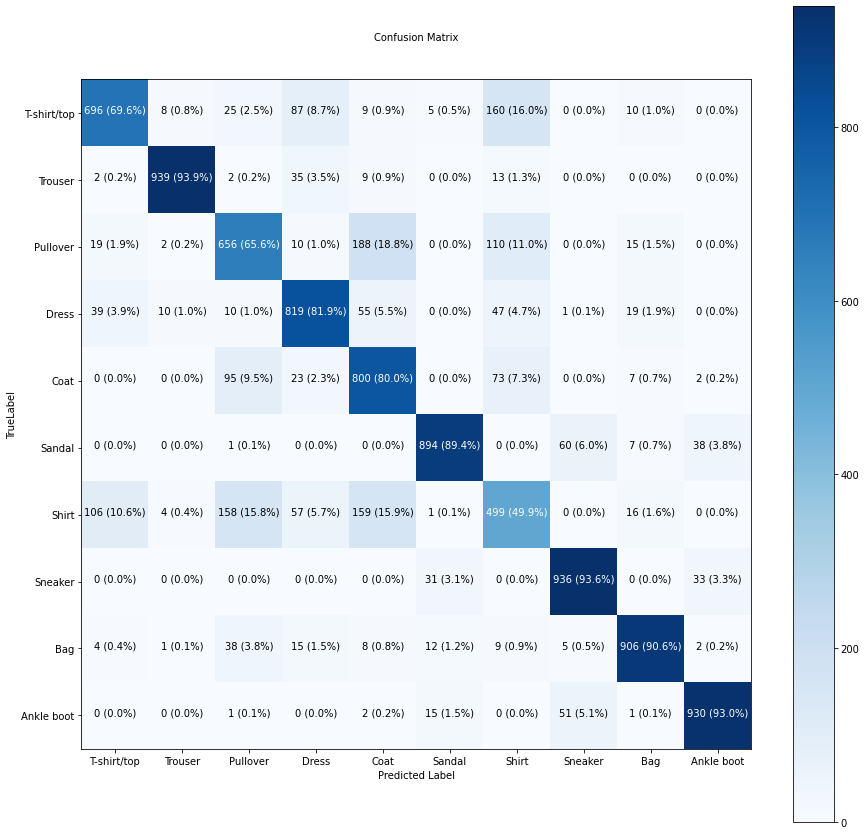

In [ ]:
# make a prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15, 15),
                      text_size = 10)

# **What patterns is our model learning**

In [ ]:
# Find the layers of our most recent model
model_15.layers # list of layers

In [ ]:
# Extract a particular layer
model_15.layers[1]

We can get the patterns learned by a particular layer using `.get_weights()` method.

In [ ]:
# Get the patterns of a layer inour network
weights, biases = model_15.layers[1].get_weights()

# Shapes
weights, weights.shape


(array([[ 0.7150265 , -0.06077104, -0.9976307 , -1.0484309 ],
        [ 0.27732122, -0.4715538 , -0.52916485,  0.02329245],
        [ 0.775243  ,  0.54027563, -1.1288568 , -0.74261576],
        ...,
        [-0.39453435,  0.4762872 , -0.22641516,  0.25505933],
        [-0.40515792,  0.6181003 ,  0.23928401, -0.5038762 ],
        [ 0.2388457 ,  0.11606938, -0.12131395,  0.04352421]],
       dtype=float32), (784, 4))

Now let's check on the bias vector

In [ ]:
biases, biases.shape

(array([ 2.4485877e-02, -6.1457325e-04, -2.7230197e-01,  8.1124955e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with the weight matrix.

The bias vector gets initialized as zeros (at least in the case of a Tensorflow Dense layers)

The bias vector dictates how much patterns within the coresponding weight matrix should influence the next layer.

In [ ]:
model_15.summary()

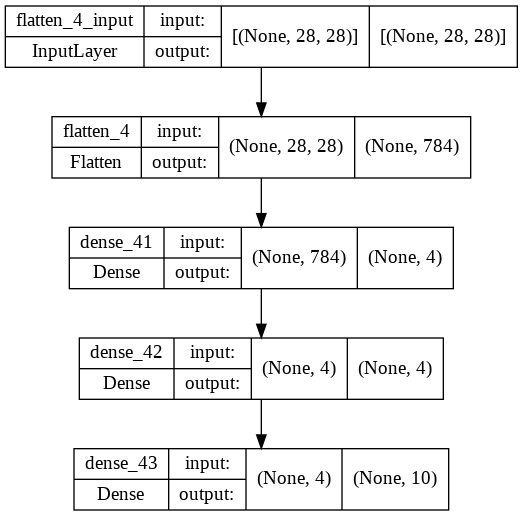

In [ ]:
# Plotting the model
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_15, show_shapes = True)